### Import data

In [1]:
import pandas as pd

housing = pd.read_csv('./melb_data.csv')

### Find duplicate rows

In [2]:
housing.duplicated().sum()

0

### Find rows that are duplicates based on specific columns

In [3]:
housing.duplicated(subset=['Rooms', 'Bedroom2']).sum()

13537

### One-Hot Encoding

In [4]:
pd.get_dummies(housing, columns=['Regionname'])

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Longtitude,Propertycount,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,144.99840,4019.0,False,False,True,False,False,False,False,False
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,144.99340,4019.0,False,False,True,False,False,False,False,False
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,144.99440,4019.0,False,False,True,False,False,False,False,False
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,144.99690,4019.0,False,False,True,False,False,False,False,False
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,144.99410,4019.0,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,145.16761,7392.0,False,False,False,False,True,False,False,False
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,144.87904,6380.0,False,False,False,False,False,False,True,False
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,144.88738,6380.0,False,False,False,False,False,False,True,False
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,144.89299,6380.0,False,False,False,False,False,False,True,False


### Target Encoding

In [5]:
import category_encoders as ce

encoder = ce.TargetEncoder(cols=['Regionname'])
housing['Region_enc'] = encoder.fit_transform(housing['Regionname'], housing['Price'])

### Frequency Encoding

In [6]:
housing['Region_enc'] = housing['Regionname'].map(housing['Regionname'].value_counts())

### Compute correlation matrix

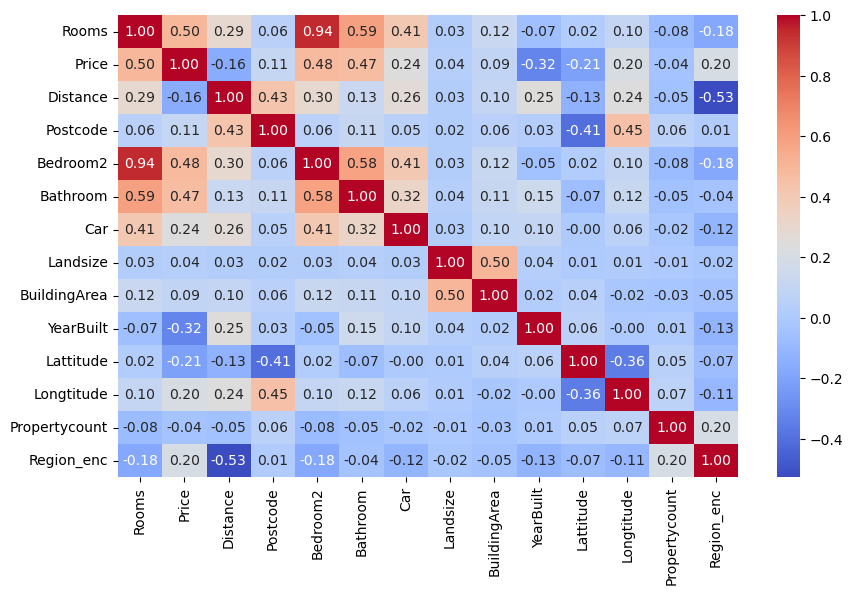

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = housing.corr(numeric_only=True)

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

high_corr_features = corr_matrix.index[abs(corr_matrix['Price']) > 0.5]

### Chi-Square Test

In [8]:
import pandas as pd
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('./eicu_cohort.csv')

le = LabelEncoder()

x = le.fit_transform(df['gender']).reshape(-1,1)
y = le.fit_transform(df['actualhospitalmortality'])

chi2_stat, p_values = chi2(x, y)

print(f'The Chi-Square statistic is {chi2_stat[0]}')
print(f'The p-value is {p_values[0]}')

The Chi-Square statistic is 1.8334401709401695
The p-value is 0.17572174951176397


### ANOVA

In [9]:
housing[['Regionname', 'Suburb']]

,Regionname,Suburb
0,Northern Metropolitan,Abbotsford
1,Northern Metropolitan,Abbotsford
2,Northern Metropolitan,Abbotsford
3,Northern Metropolitan,Abbotsford
4,Northern Metropolitan,Abbotsford
...,...,...
13575,South-Eastern Metropolitan,Wheelers Hill
13576,Western Metropolitan,Williamstown
13577,Western Metropolitan,Williamstown
13578,Western Metropolitan,Williamstown


In [10]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import f_classif

le = LabelEncoder()

housing['Regionname'] = le.fit_transform(housing['Regionname'])
housing['Suburb'] = le.fit_transform(housing['Suburb'])

X = housing[['Regionname', 'Suburb']]
y = housing['Price']

f_values, p_values = f_classif(X, y)

for i, (f_val, p_val) in enumerate(zip(f_values, p_values)):
    print(f"Feature '{X.columns[i]}': F-Value = {f_val:.2f}, p-value = {p_val:.2e}")

significant_features = X.columns[p_values < 0.05]
print(f"Significant features: {list(significant_features)}")

Feature 'Regionname': F-Value = 1.10, p-value = 1.60e-03
Feature 'Suburb': F-Value = 1.12, p-value = 2.45e-04
Significant features: ['Regionname', 'Suburb']


### Recursive Feature Elimination (RFE)

In [11]:
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

numeric_df = housing.select_dtypes(include=['number'])
x = numeric_df.drop('Price', axis=1)
y = numeric_df['Price']

x = x.fillna(x.median())

model = LinearRegression()
rfe = RFE(model, n_features_to_select=5)
fit = rfe.fit(x, y)

ranking = rfe.ranking_
selected_features = x.columns[rfe.support_]

print("Feature Ranking: ", ranking)
print("Selected Features: ", selected_features)

Feature Ranking:  [ 7  1  2  6  3  1  1 10  8  5  1  1  4 11  9]
Selected Features:  Index(['Rooms', 'Bathroom', 'Car', 'Lattitude', 'Longtitude'], dtype='object')


### Sequential Feature Selection

In [12]:
from sklearn.feature_selection import SequentialFeatureSelector

model = LinearRegression()

sfs_forward = SequentialFeatureSelector(model, n_features_to_select=5, direction='forward')
sfs_forward = sfs_forward.fit(x, y)

sfs_backward = SequentialFeatureSelector(model, n_features_to_select=5, direction='backward')
sfs_backward = sfs_backward.fit(x, y)

selected_features_forward = x.columns[sfs_forward.get_support()]
selected_features_backward = x.columns[sfs_backward.get_support()]

print("Selected Features (Forward):", selected_features_forward)
print("Selected Features (Backward):", selected_features_backward)

Selected Features (Forward): Index(['Rooms', 'Distance', 'Bathroom', 'YearBuilt', 'Lattitude'], dtype='object')
Selected Features (Backward): Index(['Rooms', 'Distance', 'Bathroom', 'YearBuilt', 'Lattitude'], dtype='object')


### Lasso Feature Selection

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

lasso_cv = LassoCV(cv=10, random_state=42)
lasso_cv.fit(x_scaled, y)

optimal_alpha = lasso_cv.alpha_
print(f"Optimal alpha: {optimal_alpha}")

lasso_coefficients = pd.Series(lasso_cv.coef_, index=x.columns)

print("Lasso Coefficients with Optimal Alpha:")
print(lasso_coefficients)

Optimal alpha: 13743.45106690631
Lasso Coefficients with Optimal Alpha:
Suburb           -22852.212876
Rooms            221324.101614
Distance        -192512.963615
Postcode          37839.593562
Bedroom2          33153.584635
Bathroom         135485.842241
Car               48335.490038
Landsize           2398.153055
BuildingArea      10569.485271
YearBuilt       -112363.611923
Lattitude        -81518.836664
Longtitude        80679.533158
Regionname        13211.905643
Propertycount     -2992.296515
Region_enc        52058.685526
dtype: float64


### Tree-Based Methods

In [17]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_scaled, y)

importances = model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importance_df)

Feature Importances:
          Feature  Importance
1           Rooms    0.228379
14     Region_enc    0.201550
2        Distance    0.143347
7        Landsize    0.116515
11     Longtitude    0.061104
8    BuildingArea    0.059556
10      Lattitude    0.050452
9       YearBuilt    0.030172
5        Bathroom    0.022212
13  Propertycount    0.019211
12     Regionname    0.018002
0          Suburb    0.016670
6             Car    0.014439
3        Postcode    0.013544
4        Bedroom2    0.004847
